## load tantinic dataset 

In [1]:
import torch

# # 检查 GPU 是否可用
# print(torch.cuda.is_available())  # 返回 True 表示可用
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # 查看当前 GPU 设备名称
# print(torch.cuda.get_device_name(0))  # 例如: 'NVIDIA GeForce RTX 3090'
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

import time

In [4]:
import torch

import matplotlib.pyplot as plt
from torch.utils.data import Dataset #抽象类
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
from scipy.stats import mode
class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        df = pd.read_csv(filepath,header= 0)  # 自动处理混合类型
        xy = df.values  # 转换为numpy数组（dtype=object）
        print(df.dtypes)  # 查看每列的数据类型
        
        #age
        age_col = xy[:, 5].astype(float)
        mean_age = np.nanmean(age_col)
        print(f"年龄均值: {mean_age:.1f}") 
        xy[:, 5] = np.where(np.isnan(age_col), mean_age, age_col)
        
        gender_map = {'male': 0, 'female': 1,'nan' : 2}
        xy[:, 4] = np.array([gender_map[x] for x in xy[:, 4]])
        
        # Embarked
        empty_mask = pd.isna(xy[:, 11]) | (xy[:, 11] == "")
        embarked_mode = pd.Series(xy[:, 11]).mode()[0]  # 输出 'S'
        xy[empty_mask, 11] = embarked_mode

        Embarked_map = {'S': 0, 'C': 1,'Q': 2 }
        xy[:, 11] = np.array([Embarked_map[x] for x in xy[:, 11]])
        
        self.x_data = torch.from_numpy(xy[:, [2,4,5,6,7,9,11]].astype(np.float32))
        # print (self.x_data)
        self.y_data = torch.from_numpy(xy[:, [1]].astype(np.float32))
        # print("y_data = ",self.y_data)
        self.len = xy.shape[0]
        
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        return self.len
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(7, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu( self.linear1(x))
        x = self.relu( self.linear2(x))
        x = self.sigmoid( self.linear3(x))
        return x


model = Model()

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
path = '../../dataset/titanic/train.csv'
dataset = DiabetesDataset(path)   
#num_workers :读数据的时候是否并行读入，几个进程读取数据
train_loader = DataLoader(dataset=dataset,batch_size= 32,shuffle=True,num_workers=0)
batch_size= 32
cost_list=[]
epoch_list=[]
if __name__ =='__main__':
    for epoch in range(1000):        
        loss_sum =0
        start_time = time.time()
        for i,data in enumerate(train_loader,0):
            # prepare data
            inputs , labels = data
            # forward
            y_pred  = model(inputs)
            loss = criterion(y_pred,labels)
            loss_sum += loss.item()
            
            # backward
            optimizer.zero_grad()
            loss.backward()
            #update
            optimizer.step()
        elapsed_time = time.time() - start_time
        if epoch % 100 ==0:
                print(f"执行耗时: {elapsed_time:.4f} 秒",'epoch = ',epoch,'loss = ',loss_sum / (len(dataset) / batch_size + 1))
       
        cost_list.append(loss_sum / (len(dataset) / batch_size + 1))
        epoch_list.append(epoch)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
年龄均值: 29.7
执行耗时: 0.0080 秒 epoch =  0 loss =  0.4061906836273094
执行耗时: 0.0163 秒 epoch =  100 loss =  0.3908417682089759
执行耗时: 0.0176 秒 epoch =  200 loss =  0.3933143750042983
执行耗时: 0.0101 秒 epoch =  300 loss =  0.4008193589496716
执行耗时: 0.0151 秒 epoch =  400 loss =  0.4026826391499066
执行耗时: 0.0150 秒 epoch =  500 loss =  0.3916519439879115
执行耗时: 0.0051 秒 epoch =  600 loss =  0.3955738996503671
执行耗时: 0.0050 秒 epoch =  700 loss =  0.3942536661968459
执行耗时: 0.0161 秒 epoch =  800 loss =  0.39606424323399175
执行耗时: 0.0150 秒 epoch =  900 loss =  0.40660471363418926


No handles with labels found to put in legend.


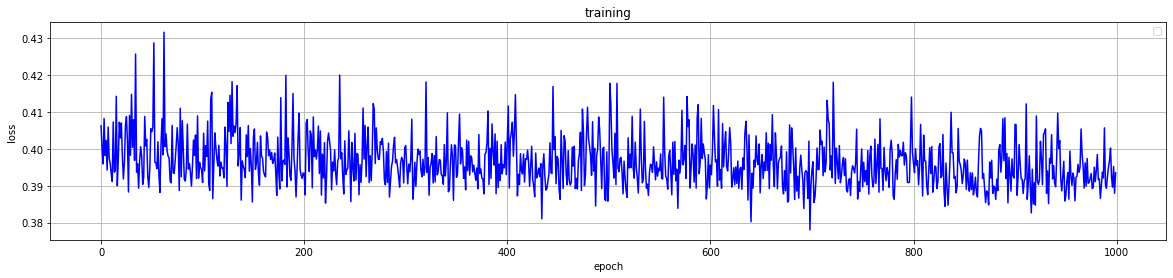

In [7]:
plt.figure(figsize=(20, 4))  # 设置图形大小
plt.plot(epoch_list, cost_list, linestyle='-', color='b')

# 添加标题和标签
plt.title('training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

# 显示图形
plt.grid(True)  # 添加网格
plt.show()

In [8]:
class TitanicDataset(Dataset):
    def __init__(self,filepath):
        df = pd.read_csv(filepath,header= 0)  # 自动处理混合类型
        xy = df.values  # 转换为numpy数组（dtype=object）
        print(df.dtypes)  # 查看每列的数据类型
        
        #age
        age_col = xy[:, 4].astype(float)
        mean_age = np.nanmean(age_col)
        print(f"年龄均值: {mean_age:.1f}") 
        xy[:, 4] = np.where(np.isnan(age_col), mean_age, age_col)
        gender_map = {'male': 0, 'female': 1,'nan' : 2}
        xy[:, 3] = np.array([gender_map[x] for x in xy[:, 3]])
        
        # Embarked
        empty_mask = pd.isna(xy[:, 10]) | (xy[:, 10] == "")
        embarked_mode = pd.Series(xy[:, 10]).mode()[0]  # 输出 'S'
        xy[empty_mask, 10] = embarked_mode

        Embarked_map = {'S': 0, 'C': 1,'Q': 2 }
        xy[:, 10] = np.array([Embarked_map[x] for x in xy[:, 10]])
        
        self.x_data = torch.from_numpy(xy[:, [1,3,4,5,6,8,10]].astype(np.float32))
        # print (self.x_data)
        # self.y_data = torch.from_numpy(xy[:, [1]].astype(np.float32))
        # # print("y_data = ",self.y_data)
        self.len = xy.shape[0]
        
    def __getitem__(self,index):
        return self.x_data[index]
    def __len__(self):
        return self.len

In [9]:
path = '../../dataset/titanic/test.csv'
test_data = TitanicDataset(path)
test_loader = DataLoader(dataset=test_data,batch_size= 32,shuffle=False,num_workers=0)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
年龄均值: 30.3


In [10]:
for i,data in enumerate(test_loader,0):
    # prepare data
    inputs = data
    # forward
    y_pred  = model(inputs)
    print ('y_pred = ',y_pred)

y_pred =  tensor([[0.1358],
        [0.6002],
        [0.2735],
        [0.1220],
        [0.4615],
        [0.2472],
        [0.8848],
        [0.1987],
        [0.7695],
        [0.1732],
        [0.1177],
        [0.4802],
        [0.9946],
        [0.1750],
        [0.9902],
        [0.9688],
        [0.2667],
        [0.1411],
        [0.5907],
        [0.7211],
        [0.6631],
        [0.3298],
        [0.9965],
        [0.5110],
        [0.9882],
        [0.0398],
        [0.9953],
        [0.1391],
        [0.4918],
        [0.1059],
        [0.1702],
        [0.2296]], grad_fn=<SigmoidBackward0>)
y_pred =  tensor([[0.4609],
        [0.4215],
        [0.6437],
        [0.1446],
        [0.6450],
        [0.7007],
        [0.1249],
        [0.3478],
        [0.1157],
        [0.4562],
        [0.1057],
        [0.9688],
        [0.9865],
        [0.1241],
        [0.5814],
        [0.1415],
        [0.9980],
        [0.4603],
        [0.4397],
        [0.1933],
        [0.8081